In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import math

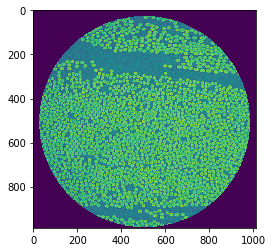

In [2]:
img = cv2.imread('week_1_data/fibres_xcth.png', cv2.IMREAD_GRAYSCALE)
img = img.astype(float)
plt.imshow(img)
plt.show()

## Task 1

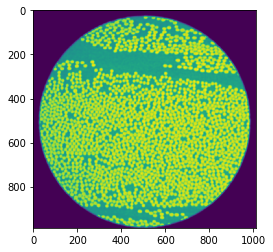

In [3]:
# Verify the separability of the Gausian kernel:
sigma = 3
t = 3*sigma

lst1D = np.array([range(2*t+1)])-t

def gaussianDens(x, m, s):
    r = np.exp(-(x-m)**2/(2*s))/(math.sqrt(s*2*math.pi))
    return r

kernel_row1D = gaussianDens(lst1D, 0, sigma**2)
kernel_col1D = gaussianDens(lst1D, 0, sigma**2).transpose()

conv_img = scipy.ndimage.convolve(img, kernel_row1D)
conv_img = scipy.ndimage.convolve(conv_img, kernel_col1D)

plt.imshow(conv_img)
plt.show()

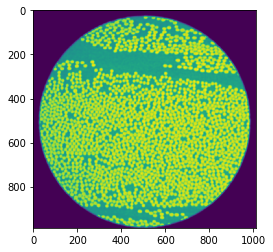

In [4]:
def gaussDens_2d(x, y, m, s):
    #s=s**2
    r = np.exp(-((x-m)**2+(y-m)**2)/(2*s))/(s*2*math.pi)
    return r

lst2D = np.ones((2*t+1, 2*t+1))

for i in range(2*t+1):
    i2 = i-t
    for j in range(2*t+1):
        j2 = j-t
        lst2D[i][j] = gaussDens_2d(i2, j2, 0, sigma**2)
        
kernel_2D = lst2D

conv_img_2d = scipy.ndimage.convolve(img, kernel_2D )

plt.imshow(conv_img_2d)
plt.show()

Min diff:  -4.547473508864641e-13
Max diff:  4.547473508864641e-13


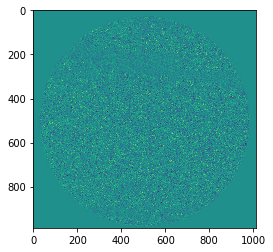

In [5]:
diff = conv_img_2d - conv_img
print("Min diff: ", min(map(lambda x: min(x), diff)))
print("Max diff: ", max(map(lambda x: max(x), diff)))
plt.imshow(diff)
plt.show()

## Task 2
We now compare the original image convolved with the derivative of a gaussian to the derivative of the allready convolved image.

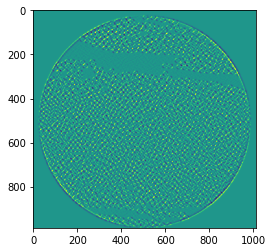

In [6]:
# Kernel used to compute the derivative of a picture in 1d:
diff_kernel = np.array([[0.5, 0.0, -0.5]])

# Img convolved with a gaussian, then derivative:
conv_img_gauss = scipy.ndimage.gaussian_filter(img, sigma, order=0)
conv_img_gauss_div1 = scipy.ndimage.convolve(conv_img_gauss, diff_kernel)
conv_img_gauss_div1 = scipy.ndimage.convolve(conv_img_gauss_div1, diff_kernel.transpose())

plt.imshow(conv_img_gauss_div1)
plt.show()

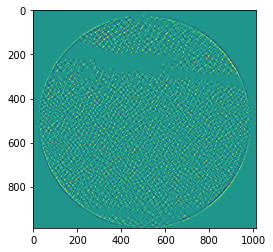

In [7]:
# Img convoluted with derivative of gaussian:
conv_img_gauss_div2 = scipy.ndimage.gaussian_filter(img, sigma, order=1)

plt.imshow(conv_img_gauss_div2)
plt.show()

Min diff:  -0.15149223671915601
Max diff:  0.14047998739774492


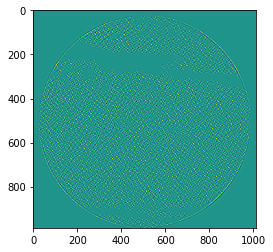

In [8]:
diff = conv_img_gauss_div1 - conv_img_gauss_div2
print("Min diff: ", min(map(lambda x: min(x), diff)))
print("Max diff: ", max(map(lambda x: max(x), diff)))
plt.imshow(diff)
plt.show()

## Task 3
Test if a single large convolution with a Gaussian of t = 20 is equal
to ten convolutions with a Gaussian of t = 2.

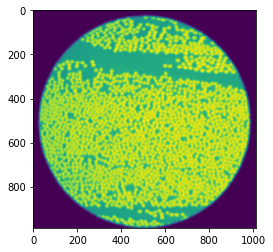

In [9]:
conv_img1 = scipy.ndimage.gaussian_filter(img, sigma=math.sqrt(20), order=0)

plt.imshow(conv_img1)
plt.show()

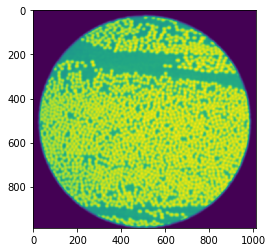

In [10]:
conv_img2 = img
for i in range(10):
    conv_img2 = scipy.ndimage.gaussian_filter(conv_img2, sigma=math.sqrt(2), order=0)

plt.imshow(conv_img2)
plt.show()

Min diff:  -0.005173354114587227
Max diff:  0.0055789821386724725


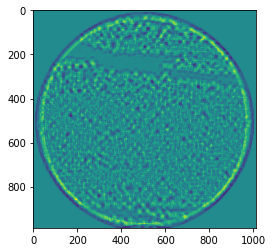

In [11]:
diff = conv_img1 - conv_img2
print("Min diff: ", min(map(lambda x: min(x), diff)))
print("Max diff: ", max(map(lambda x: max(x), diff)))
plt.imshow(diff)
plt.show()

## Task 4
Test if convolution with a large Gaussian derivative is equal to convolving with a Gaussian with t = 10 and a Gaussian
derivative with t = 10.

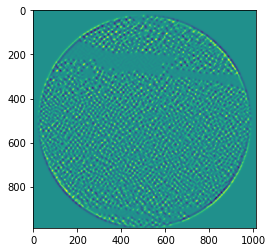

In [12]:
conv_img1 = scipy.ndimage.gaussian_filter(img, sigma=math.sqrt(20), order=1)

plt.imshow(conv_img1)
plt.show()

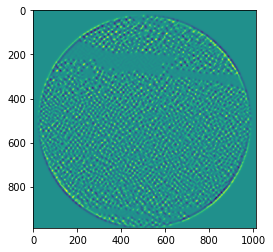

In [13]:
conv_img2 = scipy.ndimage.gaussian_filter(img, sigma=math.sqrt(10), order=0)
conv_img2 = scipy.ndimage.gaussian_filter(conv_img2, sigma=math.sqrt(10), order=1)

plt.imshow(conv_img2)
plt.show()

Min diff:  -0.0004818308375821867
Max diff:  0.00043518099347217287


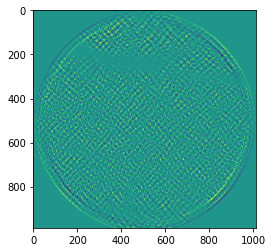

In [14]:
diff = conv_img1 - conv_img2
print("Min diff: ", min(map(lambda x: min(x), diff)))
print("Max diff: ", max(map(lambda x: max(x), diff)))
plt.imshow(diff)
plt.show()

# Part 2


## Task 1

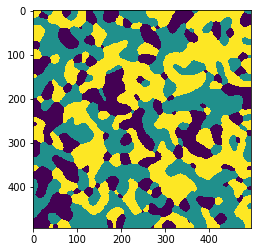

In [15]:
img = cv2.imread('week_1_data/fuel_cell_1.tif', cv2.IMREAD_GRAYSCALE)
img = img.astype(float)
plt.imshow(img)
plt.show()

In [26]:

def segBoundLen(img):
    img_t = img.transpose()
    h1 = np.count_nonzero(img[:-1]-img[1:])
    v1 = np.count_nonzero(img_t[:-1]-img_t[1:])
    return((h1+v1)*2)

print(segBoundLen(img))
print(segBoundLen(np.identity(2)))


32656
8
0.130624


# Part 3


## Task 1

In [17]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

# let X denote a snake:
f = open('week_1_data/dino_noisy.txt').read()
x = []
for line in f.split('\n'):
    split_line=line.split(" ")
    if len(split_line)>1:
        x.append([float(split_line[0]), float(split_line[1])])

x.append(x[0])
x = np.array(x)

In [27]:
# Naive approach as asked for in task 1:
N = len(x)
I = np.identity(N)
L = -2*np.identity(N)
L[1:,:-1] = L[1:,:-1] + np.identity(N-1)
L[:-1, 1:] = L[:-1, 1:] + np.identity(N-1)
L[0, 0] = -2
L[N-1, N-1] = -2
L[N-1, 0] = 1
L[0, N-1] = 1

def curveSmoothNaive(x, lamb, n):
    x_new = np.matmul((I+lamb*L), x)
    if n > 0:
        x_new = curveSmoothNaive(x_new, lamb, n-1)
    return(x_new)

[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


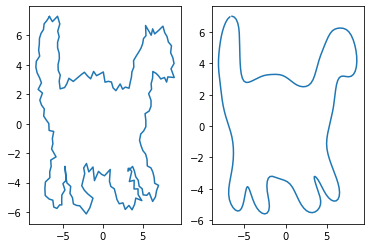

In [19]:
x_smooth1 = curveSmoothNaive(x, 0.2, 10)

plt.subplot(1, 2, 1)
plt.plot(x[:,0], x[:,1])

plt.subplot(1, 2, 2)
plt.plot(x_smooth1[:,0], x_smooth1[:,1])

In [20]:
# implicit smoothing:
def implicitSmooth(x, lamb):
    x_new = np.matmul(np.linalg.inv(I-lamb*L), x)
    return x_new

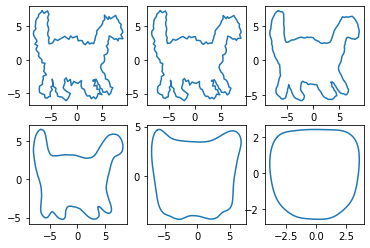

In [21]:
plt.subplot(2, 3, 1)
plt.plot(x[:,0], x[:,1])

for i in range(5):
    plt.subplot(2, 3, i+2)
    x_smooth2 = implicitSmooth(x, 1*10**(i-1))
    plt.plot(x_smooth2[:,0], x_smooth2[:,1])

In [32]:
# Task 3:

def extendedKernelSmothing(alpha, beta, N):
    
    Alph = np.zeros((N,N))
    Alph[1:, :-1] = Alph[1:, :-1] + np.identity(N-1)
    Alph[:-1, 1:] = Alph[:-1, 1:] + np.identity(N-1)
    Alph = Alph + (-2)*np.identity(N)
    Alph[0,N-1] = 1
    Alph[N-1,0] = 1
    
    Bet = np.zeros((N,N)) + (-6)*np.identity(N)
    Bet[2:,:-2] = Bet[2:,:-2] + (-1)*np.identity(N-2)
    Bet[:-2,2:] = Bet[:-2,2:] + (-1)*np.identity(N-2)
    Bet[1:,:-1] = Bet[1:,:-1] + 4*np.identity(N-1)
    Bet[:-1,1:] = Bet[:-1,1:] + 4*np.identity(N-1)
    Bet[0,N-2] = -1
    Bet[1,N-1] = -1
    Bet[N-2,0] = -1
    Bet[N-1,1] = -1
    Bet[N-1, 0] = 4
    Bet[0, N-1] = 4
    
    #print(Alph)
    print(Bet)
    
    return(alpha*Alph + beta*Bet)

foo = extendedKernelSmothing(1, 1, N)

[[-6.  4. -1. ...  0. -1.  4.]
 [ 4. -6.  4. ...  0.  0. -1.]
 [-1.  4. -6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -6.  4. -1.]
 [-1.  0.  0. ...  4. -6.  4.]
 [ 4. -1.  0. ... -1.  4. -6.]]


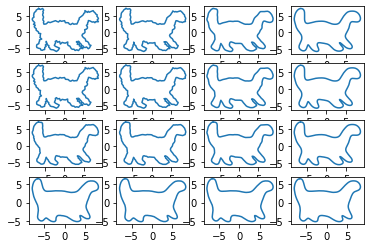

In [23]:
# implicit smoothing:
def implicitSmooth_v2(x, alpha, beta):
    ker = extendedKernelSmothing(alpha, beta, N)
    x_new = np.matmul(np.linalg.inv(I-ker), x)
    return x_new

for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, 4*i+j+1)
        x_smooth2 = implicitSmooth_v2(x, 10**(i-2), 10**(j-2))
        plt.plot(x_smooth2[:,0], x_smooth2[:,1])

# Large beta and small alhpa preserves the shape better than bigger alpha.